1. Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).

In [93]:
import pandas as pd
import seaborn as sns
import numpy as np

gr1=[139,184,85,112,134,121]
gr2=[137,175,94,103,142,101]
gr3=[24,103,83,51,65,42]
#numb=[0,1,2,3,4,5]
Frame = pd.DataFrame({
    #"Number": numb,
    "gr1":gr1,
    "gr2":gr2,
    "gr3":gr3
    
},index = np.arange(1, len(gr1)+1))
Frame

,gr1,gr2,gr3
1,139,137,24
2,184,175,103
3,85,94,83
4,112,103,51
5,134,142,65
6,121,101,42


In [94]:
mean1=round((Frame["gr1"].mean()),10)
mean2=round((Frame["gr2"].mean()),10)  
mean3=round((Frame["gr3"].mean()),10)
std1=round((Frame["gr1"].std()),10)
std2=round((Frame["gr2"].std()),10)
std3=round((Frame["gr3"].std()),10)
Frame2=pd.DataFrame({"gr1": gr1,"gr2": gr2,"gr3": gr3})
Frame2.loc["Avrg: "]=[mean1,mean2,mean3]
Frame2.loc["Avrg deviation: "]=[std1,std2,std3]
Frame2

,gr1,gr2,gr3
0,139.000000,137.000000,24.000000
1,184.000000,175.000000,103.000000
2,85.000000,94.000000,83.000000
3,112.000000,103.000000,51.000000
4,134.000000,142.000000,65.000000
5,121.000000,101.000000,42.000000
Avrg:,129.166667,125.333333,61.333333
Avrg deviation:,32.981308,31.474858,28.612352


2. Побудувати графік розкиду в групах.

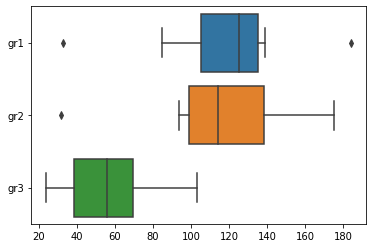

In [95]:
sns.boxplot(data=Frame2, orient='h')

3. Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.
4. Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.

In [96]:
def disp(inf):
    c = (len(inf.iloc[0,:]))
    Tc = 0
    Tc2 = 0
    n = 0
    N = 0
    s2 = 0
    T = 0
    s1 = 0
    for i in range (c):
        Tc = sum(inf.iloc[:,i])
        Tc2+=(Tc)**2
    for i in range(c):
        n = len(inf.iloc[:,i])
        N += n
    for i in range (c):
        T = sum(inf.iloc[:,i])
        s2 += T
        
    s2 = (s2)**2

    
    for i in range (c):
        for j in range(len(inf.iloc[:,i-1])):
            s1 += (inf.iloc[j][i])**2
                      
    konst = s2 / N
    SSfact = (Tc2 / n) - konst
    SSzag = s1 - ((s2) / N)
    SSvip = SSzag - SSfact
    dfact = c - 1
    dzag = N - 1
    dvip = dzag - dfact
    MSfact = SSfact / dfact
    MSvip = SSvip / dvip
    Femp = MSfact / MSvip
    
    if((26 < (dvip) and (dvip) <= 28)):
        dvip = 26
        
    elif((28 < (dvip) and (dvip) <= 30)):
        dvip = 27
        
    elif((dvip) > 30 and (dvip) <= 40):
        dvip = 28
        
    elif((dvip) > 40 and (dvip) <= 60):
        dvip = 29
        
    elif((dvip) > 60 and (dvip) <= 120):
        dvip = 30
        
    elif((dvip) > 120):
        dvip = 31
        
    else:
        dvip = dvip
        
    if(10 < n and n <= 15):
        dfact = 11
        
    elif(15 < n and n <= 20):
        dfact = 12
        
    elif(20 < n and n <= 30):
        dfact = 13
        
    elif(n > 30):
        dfact = 14

    else:
        dfact = c - 1
        
    Fkrit = pd.read_excel("fisher.xlsx").iloc[dvip,dfact]  
    
    if(Femp >= Fkrit):
        print("Pівність середніх не підтверджена")
        
    else:
        print("Pівність середніх підтверджена")
    
    
    indexes = ["Sfact", "SSzag", "SSvip", "dfact", "zagd", "dvip", "MSfact", "MSvip", "Femp", "Fcrit"]
    
    new__dataset = pd.DataFrame({
        "Обчислене значення" : [ str(round(SSfact,2)) , str(round(SSzag,2)) ,str(round(SSvip,2)),str(dfact),str(dzag), str(dvip), str(round(MSfact,2)),str(round(MSvip,2)),str(round(Femp,2)), str(Fkrit)]},
        index = indexes
    )
    
    new__dataset.columns.name = "Характеристика"
    
    return new__dataset

In [97]:
disp(Frame)

Pівність середніх не підтверджена


Характеристика,Обчислене значення
Sfact,17424.11
SSzag,31909.61
SSvip,14485.5
dfact,2
zagd,17
dvip,15
MSfact,8712.06
MSvip,965.7
Femp,9.02
Fcrit,3.68
